In [2]:
import numpy as np
from Req import Hamiltonian, held_karp, gen_ran, gen_poly, best_nn, nearest_neighbour
from Req.greedy import repeated_2_opt
from SA.sa import simulated_annealing, random_block_reverse_mutation
from ant_colony.ant_colony import ant_colony
from time import time
from Req.req import Map
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from GraphTheory.lower_bound import lower_bound 


In [2]:
map = gen_ran(50)
(lower_bound(map.D)[1], best_nn(map).cost(), repeated_2_opt(best_nn(map)).cost(), ant_colony(map).cost(), simulated_annealing(nearest_neighbour(map), swap=random_block_reverse_mutation).cost())

/home/spull/M2R/M2R/ant_colony/ant_colony.py:35: RuntimeWarning: divide by zero encountered in true_divide
  eta = 1/map.D


(5.131647022472545,
 6.286823058723557,
 6.197147287239784,
 6.6635999130507,
 6.20340839053203)

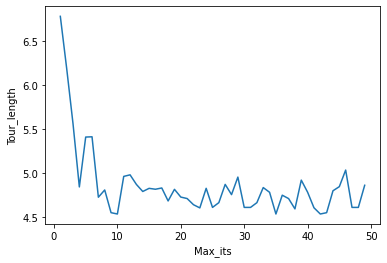

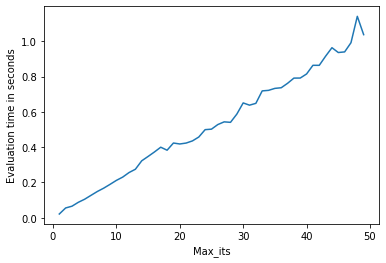

In [13]:
map = gen_ran(30)
#print(held_karp(map).cost())
times = []
tour_length = []
for i in range(1, 50):
    t0 = time()
    sol = ant_colony(map, 2.5, 2.5, 20, 0.01, 1, i)
    t1 = time()
    times.append(t1 - t0)
    tour_length.append(sol.cost())

plt.plot([i for i in range(1, 50)], tour_length)
plt.xlabel("Max_its")
plt.ylabel("Tour_length")
plt.show()
plt.plot([i for i in range(1, 50)], times)
plt.xlabel("Max_its")
plt.ylabel("Evaluation time in seconds")
plt.show()



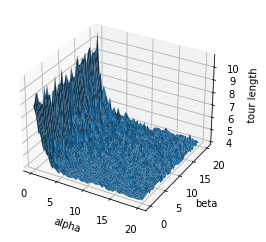

In [7]:
map = gen_ran(20)

alpha = np.linspace(0,20)
beta = np.linspace(0,20)
A, B = np.meshgrid(alpha, beta)

def f(a, b):
    return ant_colony(map, a, b, 4, 0.2, 1, 10).cost()


T = np.array([[f(a, b) for b in beta] for a in alpha])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, T)
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('tour length')

T = np.array([[f(a, b) for b in beta] for a in alpha])

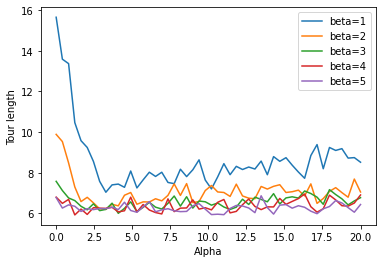

In [3]:
alpha = np.linspace(0,20)
map = gen_ran(50)
tour_length_1 = []
tour_length_2 = []
tour_length_3 = []
tour_length_4 = []
tour_length_5 = []

for a in alpha:
    sol = ant_colony(map, a, 1, 20, 0.2, 1, 10)
    tour_length_1.append(sol.cost())

for a in alpha:
    sol = ant_colony(map, a, 2, 20, 0.2, 1, 10)
    tour_length_2.append(sol.cost())

for a in alpha:
    sol = ant_colony(map, a, 3, 20, 0.2, 1, 10)
    tour_length_3.append(sol.cost())

for a in alpha:
    sol = ant_colony(map, a, 4, 20, 0.2, 1, 10)
    tour_length_4.append(sol.cost())

for a in alpha:
    sol = ant_colony(map, a, 5, 20, 0.2, 1, 10)
    tour_length_5.append(sol.cost())

plt.plot(alpha, tour_length_1, label='beta=1')
plt.plot(alpha, tour_length_2, label='beta=2')
plt.plot(alpha, tour_length_3, label='beta=3')
plt.plot(alpha, tour_length_4, label='beta=4')
plt.plot(alpha, tour_length_5, label='beta=5')
plt.xlabel("Alpha")
plt.ylabel("Tour length")
plt.legend()
plt.show()


In [4]:
lis = [str((a, b)) for a, b in zip(alpha, tour_length_1)]
print(''.join(lis))

lis = [str((a, b)) for a, b in zip(alpha, tour_length_2)]
print(''.join(lis))

lis = [str((a, b)) for a, b in zip(alpha, tour_length_3)]
print(''.join(lis))

lis = [str((a, b)) for a, b in zip(alpha, tour_length_4)]
print(''.join(lis))

lis = [str((a, b)) for a, b in zip(alpha, tour_length_5)]
print(''.join(lis))

(0.0, 15.65430874538526)(0.40816326530612246, 13.589756973081991)(0.8163265306122449, 13.371256594728376)(1.2244897959183674, 10.466112640370152)(1.6326530612244898, 9.578319053821328)(2.0408163265306123, 9.244218859583349)(2.4489795918367347, 8.555558352340563)(2.857142857142857, 7.5760912371588685)(3.2653061224489797, 7.040108232987808)(3.673469387755102, 7.402571959907997)(4.081632653061225, 7.441671811484367)(4.4897959183673475, 7.282615074227736)(4.8979591836734695, 8.084916076056487)(5.3061224489795915, 7.251322912884764)(5.714285714285714, 7.648977330952779)(6.122448979591837, 8.025909219284873)(6.530612244897959, 7.817715354262072)(6.938775510204081, 8.024300161351585)(7.346938775510204, 7.521606330925461)(7.755102040816327, 7.463207454143413)(8.16326530612245, 8.173096721419704)(8.571428571428571, 7.810208196356284)(8.979591836734695, 8.146171174377807)(9.387755102040817, 8.634537134501848)(9.795918367346939, 7.64175843593304)(10.204081632653061, 7.203190666123557)(10.61224489

/home/spull/M2R/M2R/ant_colony/ant_colony.py:35: RuntimeWarning: divide by zero encountered in true_divide
  eta = 1/map.D


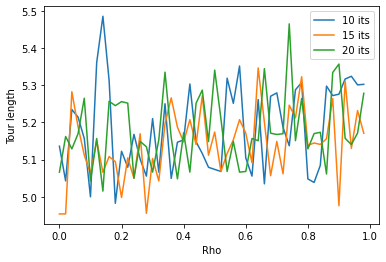

In [3]:
map = gen_ran(30)
rho = np.linspace(0,1, endpoint=False)
tour_length_10 = []
tour_length_15 = []
tour_length_20 = []
for p in rho:
    tour_length_10.append(ant_colony(map, 3, 4, 45, p, 1, 10).cost())

for p in rho:
    tour_length_15.append(ant_colony(map, 3, 4, 45, p, 1, 15).cost())

for p in rho:
    tour_length_20.append(ant_colony(map, 3, 4, 45, p, 1, 20).cost())

plt.plot(rho, tour_length_10, label='10 its')
plt.plot(rho, tour_length_15, label='15 its')
plt.plot(rho, tour_length_20, label='20 its')

plt.xlabel("Rho")
plt.ylabel("Tour length")
plt.legend()
plt.show()